<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_PyTorchTraining/blob/main/IG_ANN_UsingPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [ ]:
data, target = make_circles(n_samples=1000, noise=0.03, random_state=10)

In [ ]:
data[:5]

array([[-0.31031434, -0.68316883],
       [ 0.65484283, -0.40810234],
       [ 0.72067081,  0.42182061],
       [-0.54407753,  0.81163728],
       [-0.81208571, -0.14351782]])

In [ ]:
target[:5]

array([1, 1, 1, 0, 1])

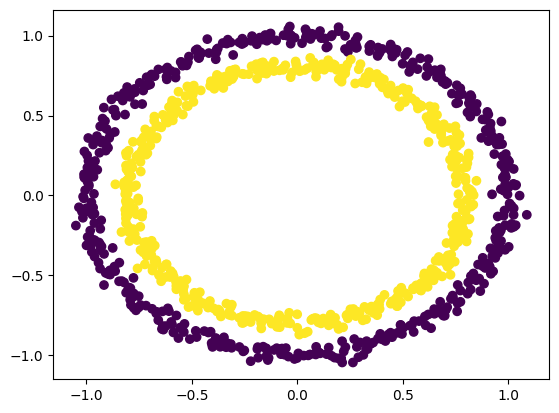

In [ ]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.show()

In [ ]:
# convert numpy array into tensor object
X = torch.from_numpy(data).type(torch.float)
y = torch.from_numpy(target).type(torch.float)

In [ ]:
# test size is 0.25 that means 25% data is reserved for testing purpose
# we apply deep learning on training data and then test our model on testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X.shape

torch.Size([1000, 2])

In [ ]:
x_train.shape

torch.Size([750, 2])

In [ ]:
# Building Model

In [ ]:
# setup GPU for deep learning model
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
# nn.Module is a parent class of our Model class
class Model(nn.Module):
  # constructor of our class
  def __init__(self):
    # calling parent class constructor
    super().__init__()
    # create input layer
    # in_features - input neurons in our input layer
    # out_features - hidden layer neurons that is connected with input layer
    # nn.Linear - it applies linear equation : x.w + bias
    self.layer_1 = nn.Linear(in_features=2, out_features=4)
    self.layer_2 = nn.Linear(in_features=4, out_features=4)
    self.layer_3 = nn.Linear(in_features=4, out_features=1)
    self.activation = nn.ReLU()

  def forward(self, input_data):
    # first we pass our input data to forward method
    # then layer_1 will receive input data
    # then we pass layer_1 output to layer_2
    # then we return output that is coming out from layer_2
    x = self.activation(self.layer_1(input_data))
    x = self.activation(self.layer_2(x))
    return self.layer_3(x)

In [ ]:
model = Model().to(device)

In [ ]:
model

Model(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=4),
    nn.Linear(in_features=4, out_features=1)
).to(device)

In [ ]:
model_2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# Backpropagation
  # Loss Function
    # Binary Cross Entropy
    # Cross Entropy
    # MAE - Mean Absolute Error

  # Optimization
    # Stochastic Gradient Descent
    # Adam Optimizer

In [ ]:
# we are using Binary Cross Entropy Loss Function
loss = nn.BCEWithLogitsLoss()

# optimization technique - Stochastic Gradient Descent
# params - trainable parameters - weights and bias
# lr - learning rate
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

In [ ]:
# Evaluation metric
def accuracy(y_true, y_pred):
  # y_true = 1, y_pred = 1
  # y_true = 0, y_pred = 0
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification / len(y_pred)) * 100
  return acc

In [ ]:
# here we are calling forward method of our model
y_logits = model(x_test)[:5]

In [ ]:
y_logits

tensor([[0.1062],
        [0.2337],
        [0.0631],
        [0.0673],
        [0.1966]], grad_fn=<SliceBackward0>)

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)

In [ ]:
y_pred_probs

tensor([[0.5265],
        [0.5582],
        [0.5158],
        [0.5168],
        [0.5490]], grad_fn=<SigmoidBackward0>)

In [ ]:
y_pred = torch.round(y_pred_probs)

In [ ]:
y_pred

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)

In [ ]:
y_test[:5]

tensor([0., 1., 1., 1., 0.])

In [ ]:
y_pred = y_pred.squeeze()

In [ ]:
y_pred

tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

In [ ]:
accuracy(y_test[:5], y_pred)

60.0

In [ ]:
epochs = 90

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # training model
  model.train()

  # apply feedforward
  y_logits = model(x_train).squeeze()
  # get predictions on training data
  y_pred = torch.round(torch.sigmoid(y_logits))

  # now find out loss
  # apply binary cross entropy to get loss
  train_loss = loss(y_logits, y_train)
  acc = accuracy(y_train, y_pred)
  
  # apply optimization - apply gradient descent
  optimizer.zero_grad()
  # backpropagation
  train_loss.backward()
  optimizer.step()

  # model evaluation
  model.eval()
  with torch.inference_mode():
    y_pred_test = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(y_pred_test))
    test_loss = loss(y_pred_test, y_test)
    test_acc = accuracy(y_test, test_pred)
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {train_loss:.4f} | Acc : {acc:.2f} | Test Loss : {test_loss:.4f} | Test Acc : {test_acc:.2f}")

Epoch : 0 | Loss : 0.6981 | Acc : 48.27 | Test Loss : 0.7060 | Test Acc : 40.00
Epoch : 10 | Loss : 0.6819 | Acc : 50.80 | Test Loss : 0.6833 | Test Acc : 53.60
Epoch : 20 | Loss : 0.6082 | Acc : 71.33 | Test Loss : 0.6035 | Test Acc : 71.60
Epoch : 30 | Loss : 0.4981 | Acc : 77.07 | Test Loss : 0.4773 | Test Acc : 79.60
Epoch : 40 | Loss : 0.3952 | Acc : 79.87 | Test Loss : 0.3850 | Test Acc : 84.80
Epoch : 50 | Loss : 0.2003 | Acc : 94.00 | Test Loss : 0.1915 | Test Acc : 94.40
Epoch : 60 | Loss : 0.1155 | Acc : 98.27 | Test Loss : 0.1242 | Test Acc : 97.60
Epoch : 70 | Loss : 0.0688 | Acc : 99.07 | Test Loss : 0.0889 | Test Acc : 97.20
Epoch : 80 | Loss : 0.0465 | Acc : 99.60 | Test Loss : 0.0802 | Test Acc : 96.80


In [ ]:
y_train[:5]

tensor([1., 1., 1., 0., 1.])

In [ ]:
y_pred[:5]

tensor([1., 1., 1., 0., 0.], grad_fn=<SliceBackward0>)

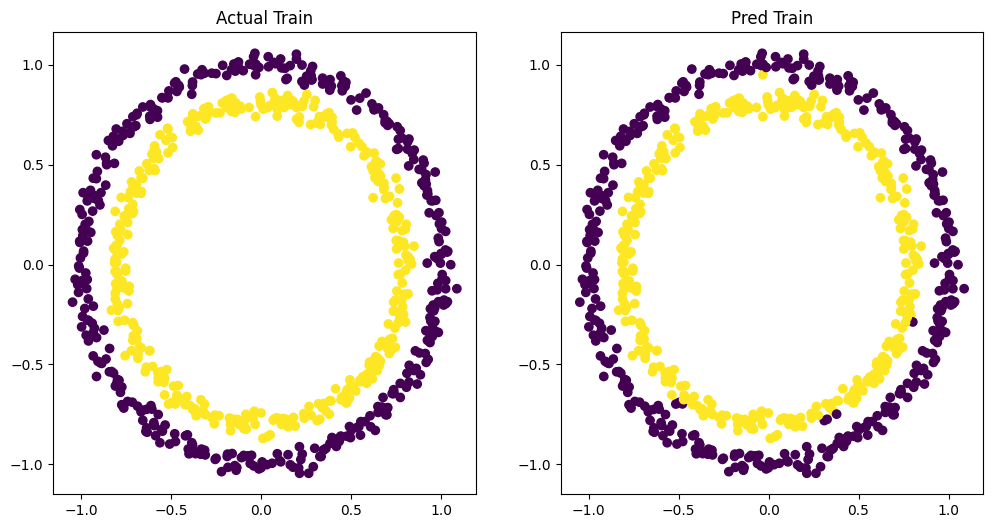

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Actual Train")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.subplot(1,2,2)
plt.title("Pred Train")
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred.detach().numpy())
plt.show()

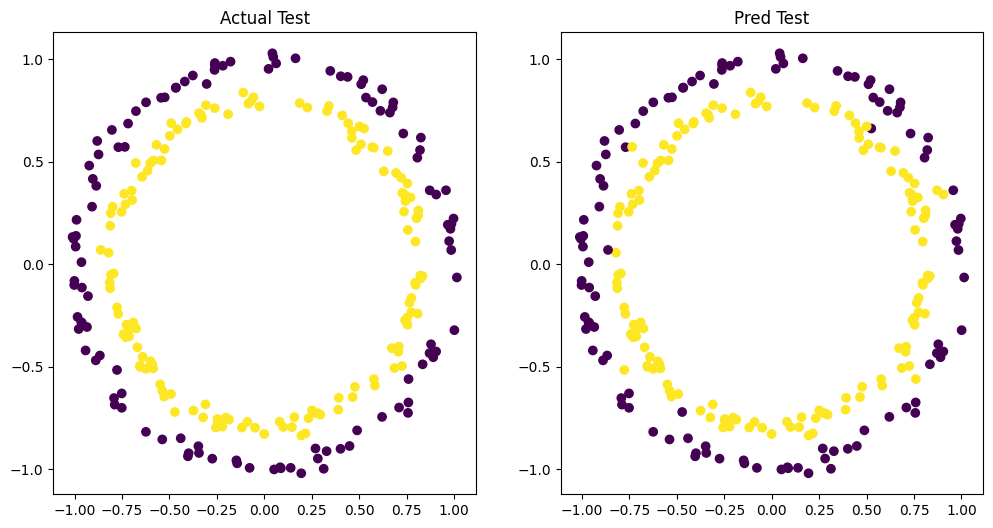

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Actual Test")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)
plt.subplot(1,2,2)
plt.title("Pred Test")
plt.scatter(x_test[:,0], x_test[:,1], c=test_pred.detach().numpy())
plt.show()